In [285]:
import numpy as np
class LinearRegression:
    def __init__(self):
        self.weights=None

    def fit(self,x,y):
        self.n_sample,self.n_feature=x.shape
        self.x,self.y=x,y
        self.bias_term=np.ones((self.n_sample,1))
        self.x=np.c_[self.bias_term,x]
        self.update_weights()

    def update_weights (self):
        self.weights=np.linalg.inv(self.x.T.dot(self.x)).dot(self.x.T).dot(self.y)

    def predict(self, X_new):
        n_samples = X_new.shape[0]
        bias_term = np.ones((n_samples, 1))
        X_new = np.c_[bias_term, X_new]
        prediction = X_new.dot(self.weights)
        return prediction

    def score(self,x,y):
        y_pre=self.predict(x)
        y_mean=np.mean(y)
        SSE=np.sum((y-y_pre)**2)
        SST=np.sum((y-y_mean)**2)
        return 1-(SSE/SST)
    

class GradientDescentRegressor:

    def __init__(self,l_rate=.01,iteration=1000,type='batch',batch_size=32,penalty='l1',alpha=.1,l1_ratio=.5,random_state= None):
        self.l_rate=l_rate
        self.iterations=iteration
        self.type=type
        self.batch_size=batch_size
        self.penalty=penalty
        self.alpha=alpha
        self.l1_ratio=l1_ratio
        self.weights=None
        np.random.seed(random_state)
        
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)
        bias = np.ones(n_samples)
        X = np.c_[bias, X]
        for epoch in range(self.iterations):
            if self.type == "batch":
                gradient = self._compute_gradient(X, y)
            elif self.type == "mini batch":
                indices = np.random.choice(n_samples, self.batch_size, replace=False)
                gradient = self._compute_gradient(X[indices], y[indices])
            elif self.type == "stochastic":
                index = np.random.choice(n_samples)
                gradient = self._compute_gradient(X[[index]], y[[index]])
            else:
                raise TypeError("only batch, mini batch and stochastic are supported")

            self.weights -= self.l_rate * 1 / (2*n_samples) * gradient
        self.y_mean = np.mean(y)

    def _compute_gradient(self, X, y):
        gradient = -2 * X.T.dot(y) + 2 * X.T.dot(X).dot(self.weights)
        if self.penalty is not None:
            if self.penalty =="l1":
                penalty = self.alpha * np.sign(self.weights)
            elif self.penalty == "l2":
                penalty = 2 * self.alpha * self.weights
            elif self.penalty == "elastic net":
                l1_penalty = self.l1_ratio * self.alpha * np.sign(self.weights)
                l2_penalty = (1 - self.l1_ratio) * self.alpha * self.weights
                penalty = self.alpha * (l1_penalty + l2_penalty)
            else:
                raise ValueError("penalty can be None, l1, l2 or elastic net")
            
            gradient[1:] += penalty[1:]
        return gradient  

    def predict(self,x):
        bias =np.ones(x.shape[0])
        x=np.c_[bias,x]
        return x.dot(self.weights)

    def score (self,x,y):
        y_pre=self.predict(x)
        y_mean=np.mean(y)
        SSE=np.sum((y-y_pre)**2)
        SST=np.sum((y-y_mean)**2)
        return 1-(SSE/SST)    



In [286]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn.linear_model 
data=pd.read_csv(r'C:\Users\Amr\Documents\salary_data.csv')
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values



In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)
model1=GradientDescentRegressor(random_state=5)
model1.fit(x_train,y_train)
print(model1.weights)
test_pre=model1.predict(x_test)
print(model1.predict(x_test))
print(model1.score(x_test,y_test))



[24309.09845498  9758.026682  ]
[ 63341.20518298 126768.37861599 104324.91724739 112131.33859299
  81881.45587878  62365.40251478  38946.13847798  64317.00785118
 117010.35193399]
0.9663109826791433


In [288]:
mo=sklearn.linear_model.SGDRegressor(random_state=5)
mo.fit(x_train,y_train)
print(mo.coef_,mo.intercept_)
print(mo.predict(x_test))
print(mo.score(x_test,y_test))


[10513.83138019] [19526.3896161]
[ 61581.71513686 129921.61910809 105739.80693365 114150.87203781
  81557.99475922  60530.33199884  35297.13668639  62633.09827488
 119407.7877279 ]
0.9640324102415616


In [289]:
m=sklearn.linear_model.LinearRegression()
m.fit(x_train,y_train)
m.predict(x_test)

array([ 64374.49262392, 124811.92649812, 103426.3729734 , 110864.82637331,
        82040.81944869,  63444.68594893,  41129.32574923,  65304.29929891,
       115513.85974824])

In [290]:
moo=LinearRegression()
moo.fit(x_train,y_train)
moo.predict(x_test)

array([ 64374.49262392, 124811.92649812, 103426.3729734 , 110864.82637331,
        82040.81944869,  63444.68594893,  41129.32574923,  65304.29929891,
       115513.85974824])

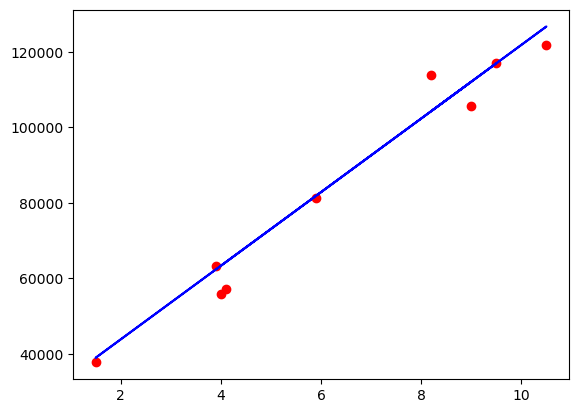

In [291]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,c='r')
plt.plot(x_test,test_pre,c='b')
plt.show()